In [2]:
import cv2
import glob
import numpy as np
from PIL import Image
 
def npz():
    # 图像路径
    path = r'..\segmentation\train\image\*.jpg'
    path_npz = r'../segmentation/train_npz/' 
    path_resize = r'..\segmentation\train\image_resized'
    for i, img_path in enumerate(glob.glob(path)):
        img = cv2.imread(img_path)
        img = cv2.resize(img,(512, 512))
        cv2.imwrite(path_resize+'\\'+str(i+1)+'.jpg', img)
        print(img.shape)
# npz()

In [66]:
import os
path = r'..\segmentation\train\image'
for x, y, z in os.walk(path):
    print(x, y, z)

..\segmentation\train\image [] ['1.jpg', '10.jpg', '11.jpg', '12.jpg', '13.jpg', '14.jpg', '15.jpg', '16.jpg', '17.jpg', '18.jpg', '19.jpg', '2.jpg', '20.jpg', '3.jpg', '4.jpg', '5.jpg', '6.jpg', '7.jpg', '8.jpg', '9.jpg']


In [9]:
import os

threshold = 1
 
table = []
for i in range(256):
    if i < threshold:
        table.append(0)
    else:
        table.append(1)

def process_img(data_dir, save_dir):        
    for root, dirs, file_names in os.walk(data_dir):
        for i in range(len(file_names)):
            img_name = file_names[i]
            path_img = os.path.join(root, img_name)
            print(path_img)
            # img = cv2.imread(path_img)
            # print(img.shape)
            # img = cv2.resize(img, (512, 512))
            # cv2.imwrite(save_dir+'\\'+img_name, img)
            # print(img.shape)
            # img = Image.open(path_img)
            # img = Image.open(path_img).point(table, '1')
            # img = img.resize((512, 512)).convert('1')
            img = Image.open(path_img).convert('1')
            img = img.resize((512, 512))
            img.save(save_dir+'/'+img_name)
data_dir = 'train/label'
save_dir = 'train/label_resized'
process_img(data_dir, save_dir)

train/label/16.jpg
train/label/19.jpg
train/label/1.jpg
train/label/3.jpg
train/label/14.jpg
train/label/12.jpg
train/label/15.jpg
train/label/20.jpg
train/label/9.jpg
train/label/13.jpg
train/label/8.jpg
train/label/11.jpg
train/label/17.jpg
train/label/10.jpg
train/label/2.jpg
train/label/5.jpg
train/label/7.jpg
train/label/18.jpg
train/label/4.jpg
train/label/6.jpg


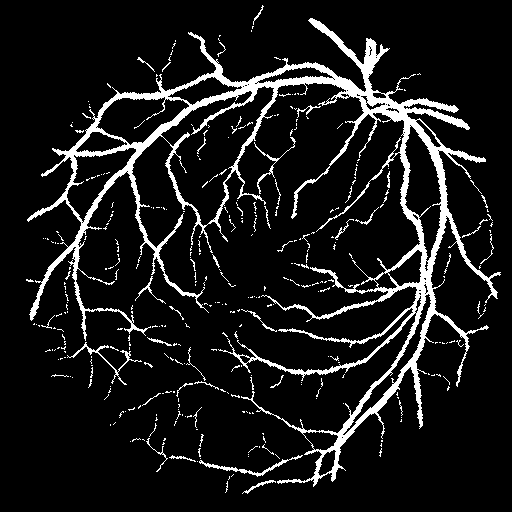

In [45]:
import cv2
import glob
import numpy as np
from PIL import Image, ImageEnhance, ImageFilter
test_path = './train/label_enhanced/100.jpg'
test_path = './train/label_resized/20.jpg'
# test_path = './train/label/1.jpg'
# img = cv2.imread(test_path, flags=0)
# img = Image.fromarray(np.array(Image.open(test_path)))
threshold = 255
 
table = []
for i in range(256):
    if i < threshold:
        table.append(0)
    else:
        table.append(1)

# img = Image.open(test_path)
# img1 = img.point(table, '1')
# np_img = np.array(img, dtype=np.float32)/255.
# img, img1

# label = Image.open(test_path).point(table, '1')
# label.resize((512, 512))
# img = Image.open(test_path).convert('1')
# img = img.resize((512, 512))
# np_img = np.asarray(img, dtype=np.float32)
# np.set_printoptions(threshold=3000000)
img = Image.open(test_path).convert('1')
img = img.rotate(45)
np_img = np.asarray(img, dtype=np.float32)
img

In [37]:
np_img

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [24]:
import os
import cv2
import glob
import numpy as np
from PIL import Image
from PIL import Image, ImageEnhance, ImageFilter

def apply_noise(image, noise_matrix):
   image_array = np.array(image)
   image_array += noise_matrix
   return Image.fromarray(np.clip(image_array, 0, 255).astype(np.uint8))

# 20-40 对比度增强
# 40-60 色彩饱和度增强
# 60-80 锐化
# 80-100 旋转四十五度
# 100-120 反转
# 120-140 模糊 5
# 140-160 降低亮度
# 160-180 降低亮度后模拟有雾
def process_img(data_dir, save_dir):        
    for root, dirs, file_names in os.walk(data_dir):
        for i in range(len(file_names)):
            img_name = file_names[i]
            path_img = os.path.join(root, img_name)

            # 增强
            img = Image.open(path_img)
            img20 = ImageEnhance.Contrast(img).enhance(1.5)  # 对比度增强
            img40 = ImageEnhance.Color(img).enhance(1.5)  # 饱和度增强
            img60 = ImageEnhance.Sharpness(img).enhance(1.5)  # 锐化
            img80 = img.rotate(45)  # 旋转45
            img100 = img.rotate(180)  # 旋转180
            img120 = img.filter(ImageFilter.GaussianBlur(radius=3))  # 模糊半径为3的高斯模糊
            enhancer = ImageEnhance.Brightness(img)
            img140 = enhancer.enhance(factor=0.3)  # 降低图像亮度
            # 模拟起雾
            fog_image = Image.new('RGB', img.size, (255, 255, 255))
            for_img = Image.blend(img140, fog_image, 0.2)
            img160 = for_img
            print(img.size)
            img.save(save_dir+f'/{int(img_name[:-4])}.jpg')
            img20.save(save_dir+f'/{int(img_name[:-4])+20}.jpg')
            img40.save(save_dir+f'/{int(img_name[:-4])+40}.jpg')
            img60.save(save_dir+f'/{int(img_name[:-4])+60}.jpg')
            img80.save(save_dir+f'/{int(img_name[:-4])+80}.jpg')
            img100.save(save_dir+f'/{int(img_name[:-4])+100}.jpg')
            img120.save(save_dir+f'/{int(img_name[:-4])+120}.jpg')
            img140.save(save_dir+f'/{int(img_name[:-4])+140}.jpg')
            img160.save(save_dir+f'/{int(img_name[:-4])+160}.jpg')
            # 对应label
            label_path = path_img.replace('image', 'label_gif')
            label_path = label_path.replace('jpg', 'gif')
            label_savepath = save_dir.replace('image', 'label')
            label = Image.open(label_path)
            label.save(label_savepath+f'/{int(img_name[:-4])}.gif')
            label.save(label_savepath+f'/{int(img_name[:-4])+20}.gif')
            label.save(label_savepath+f'/{int(img_name[:-4])+40}.gif')
            label.save(label_savepath+f'/{int(img_name[:-4])+60}.gif')
            label80 = label.rotate(45)  # 旋转45
            label80.save(label_savepath+f'/{int(img_name[:-4])+80}.gif')
            label100 = label.rotate(180)  # 旋转180
            label100.save(label_savepath+f'/{int(img_name[:-4])+100}.gif')
            label.save(label_savepath+f'/{int(img_name[:-4])+120}.gif')
            label.save(label_savepath+f'/{int(img_name[:-4])+140}.gif')
            label.save(label_savepath+f'/{int(img_name[:-4])+160}.gif')
data_dir = 'train/image'
save_dir = 'train/image_orishape_enhanced'
process_img(data_dir, save_dir)

(565, 584)
(565, 584)
(565, 584)
(565, 584)
(565, 584)
(565, 584)
(565, 584)
(565, 584)
(565, 584)
(565, 584)
(565, 584)
(565, 584)
(565, 584)
(565, 584)
(565, 584)
(565, 584)
(565, 584)
(565, 584)
(565, 584)
(565, 584)


In [4]:
import os
import cv2
import glob
import numpy as np
from PIL import Image
from PIL import Image, ImageEnhance, ImageFilter

def apply_noise(image, noise_matrix):
   image_array = np.array(image)
   image_array += noise_matrix
   return Image.fromarray(np.clip(image_array, 0, 255).astype(np.uint8))
 
# stage1 好学
# 1-20 原图
# 20-40 对比度增强
# 40-60 色彩饱和度增强
# 60-80 锐化
# 80-100 旋转四十五度

# stage2 难学
# 1-20 模糊 3
# 20-40 降低亮度
# 40-60 模拟有雾
# 60-80 模拟起雾 降低亮度
# 80-100 模糊 3 模拟起雾 降低亮度
def process_img(data_dir, save_dir):   
    label_savepath = save_dir.replace('image', 'label')    
    if not os.path.exists(save_dir):
        os.makedirs(save_dir) 
    if not os.path.exists(label_savepath):
        os.makedirs(label_savepath) 
    for root, dirs, file_names in os.walk(data_dir):
        for i in range(len(file_names)):
            img_name = file_names[i]
            path_img = os.path.join(root, img_name)
            # # stage1
            # img = Image.open(path_img)
            # img20 = ImageEnhance.Contrast(img).enhance(1.5)  # 对比度增强
            # img40 = ImageEnhance.Color(img).enhance(1.5)  # 饱和度增强
            # img60 = ImageEnhance.Sharpness(img).enhance(1.5)  # 锐化
            # img80 = img.rotate(45)  # 旋转45
            
            # stage2
            img = Image.open(path_img)
            img0 = img.filter(ImageFilter.GaussianBlur(radius=3))  # 模糊 3
            # 降低图像亮度
            enhancer = ImageEnhance.Brightness(img)
            img20 = enhancer.enhance(factor=0.3)  
            # 模拟起雾
            fog_image = Image.new('RGB', img.size, (255, 255, 255))
            img40 = Image.blend(img, fog_image, 0.5)
            # 模拟起雾 降低亮度
            enhancer2 = ImageEnhance.Brightness(img40)
            img60 = enhancer2.enhance(factor=0.3)
            # 模糊 3 模拟起雾 降低亮度
            img80 = Image.blend(img0, fog_image, 0.5)
            enhancer3 = ImageEnhance.Brightness(img80)
            img80 = enhancer3.enhance(factor=0.3)
            print(img.size)
            # 模糊
            img0.save(save_dir+f'/{int(img_name[:-4])}.jpg')
            img20.save(save_dir+f'/{int(img_name[:-4])+20}.jpg')
            img40.save(save_dir+f'/{int(img_name[:-4])+40}.jpg')
            img60.save(save_dir+f'/{int(img_name[:-4])+60}.jpg')
            img80.save(save_dir+f'/{int(img_name[:-4])+80}.jpg')
            # img100.save(save_dir+f'/{int(img_name[:-4])+100}.jpg')
            # img120.save(save_dir+f'/{int(img_name[:-4])+120}.jpg')
            # img140.save(save_dir+f'/{int(img_name[:-4])+140}.jpg')
            # img160.save(save_dir+f'/{int(img_name[:-4])+160}.jpg')
            # 对应label
            label_path = path_img.replace('image', 'label_gif').replace('jpg', 'gif')
            label = Image.open(label_path)
            label.save(label_savepath+f'/{int(img_name[:-4])}.gif')
            label.save(label_savepath+f'/{int(img_name[:-4])+20}.gif')
            label.save(label_savepath+f'/{int(img_name[:-4])+40}.gif')
            label.save(label_savepath+f'/{int(img_name[:-4])+60}.gif')
            label.save(label_savepath+f'/{int(img_name[:-4])+80}.gif')
            # label80 = label.rotate(45)  # 旋转45
            # label80.save(label_savepath+f'/{int(img_name[:-4])+80}.gif')

            # label.save(label_savepath+f'/{int(img_name[:-4])+120}.gif')
            # label.save(label_savepath+f'/{int(img_name[:-4])+140}.gif')
            # label.save(label_savepath+f'/{int(img_name[:-4])+160}.gif')
data_dir = 'train/image'
save_dir = 'train/image_stage2'
process_img(data_dir, save_dir)

(565, 584)
(565, 584)
(565, 584)
(565, 584)
(565, 584)
(565, 584)
(565, 584)
(565, 584)
(565, 584)
(565, 584)
(565, 584)
(565, 584)
(565, 584)
(565, 584)
(565, 584)
(565, 584)
(565, 584)
(565, 584)
(565, 584)
(565, 584)


In [62]:
import os
# 20-40 对比度增强
# 40-60 色彩饱和度增强
# 60-80 锐化
# 80-100 旋转四十五度
# 100*-120 反转
def process_img(data_dir, save_dir):        
    for root, dirs, file_names in os.walk(data_dir):
        for i in range(len(file_names)):
            img_name = file_names[i]
            path_img = os.path.join(root, img_name)
            print(path_img)
            # img = cv2.imread(path_img)
            # print(img.shape)
            # img = cv2.resize(img, (512, 512))
            # cv2.imwrite(save_dir+'\\'+img_name, img)
            # print(img.shape)
            # img = Image.open(path_img)
            # img = Image.open(path_img)
            # enhanced_img = img.rotate(180)
            # enhanced_img.save(save_dir+f'/{int(img_name[:-4])+100}.jpg')
            # # 检查size
            # img = Image.open(path_img)
            # print(f'img:{img.size}')
            # label_path = path_img.replace('image', 'label')
            # label = Image.open(label_path)
            # print(f'label:{label.size}')
            label_path = path_img.replace('image', 'label')
            label_savepath = save_dir.replace('image', 'label')
            label = Image.open(label_path).convert('1')
            print(f'label:{label.size}')
            label.save(label_savepath+f'/{int(img_name[:-4])+0}.jpg')
            label.save(label_savepath+f'/{int(img_name[:-4])+20}.jpg')
            label.save(label_savepath+f'/{int(img_name[:-4])+40}.jpg')
            label.save(label_savepath+f'/{int(img_name[:-4])+60}.jpg')
            label_45 = label.rotate(45)
            label_45.save(label_savepath+f'/{int(img_name[:-4])+80}.jpg')
            label_180 = label.rotate(180)
            label_180.save(label_savepath+f'/{int(img_name[:-4])+100}.jpg')
            
data_dir = 'train/image_resized'
save_dir = 'train/image_enhanced'
process_img(data_dir, save_dir)

train/image_resized/16.jpg
label:(512, 512)
train/image_resized/19.jpg
label:(512, 512)
train/image_resized/1.jpg
label:(512, 512)
train/image_resized/3.jpg
label:(512, 512)
train/image_resized/14.jpg
label:(512, 512)
train/image_resized/12.jpg
label:(512, 512)
train/image_resized/15.jpg
label:(512, 512)
train/image_resized/20.jpg
label:(512, 512)
train/image_resized/9.jpg
label:(512, 512)
train/image_resized/13.jpg
label:(512, 512)
train/image_resized/8.jpg
label:(512, 512)
train/image_resized/11.jpg
label:(512, 512)
train/image_resized/17.jpg
label:(512, 512)
train/image_resized/10.jpg
label:(512, 512)
train/image_resized/2.jpg
label:(512, 512)
train/image_resized/5.jpg
label:(512, 512)
train/image_resized/7.jpg
label:(512, 512)
train/image_resized/18.jpg
label:(512, 512)
train/image_resized/4.jpg
label:(512, 512)
train/image_resized/6.jpg
label:(512, 512)


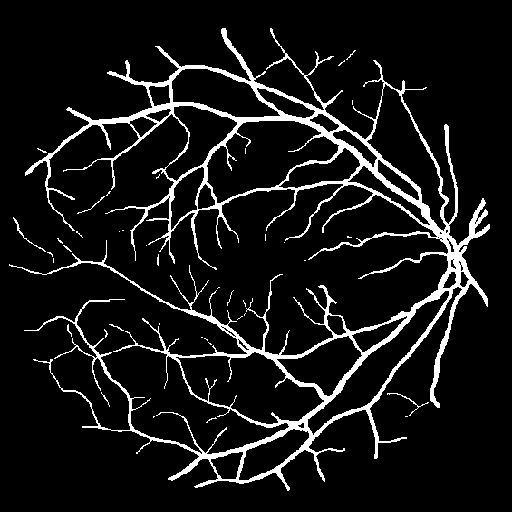

In [27]:
label.resize((512, 512))

In [48]:
label

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

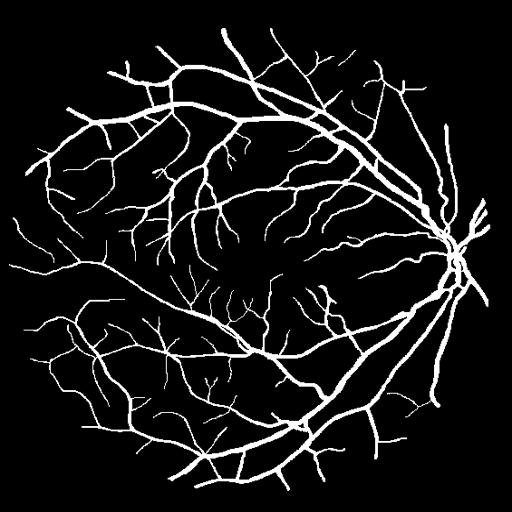

In [44]:
# np.set_printoptions(threshold=300000)
pil_img = Image.fromarray(image)
pil_img

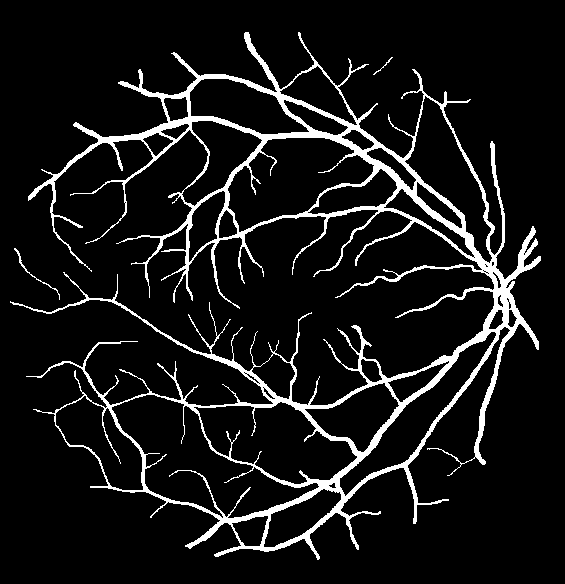

In [35]:
img1

In [10]:
# import matplotlib.image as mpimg
path = r'..\segmentation\train\image\1.jpg'
# image = np.array(Image.open(path))/255.0
# image = mpimg.imread(path)
# np.set_printoptions(threshold=300000)
# image
img = np.array(Image.open(path).convert('L'))/255.0
img.shape, np.max(img)

((584, 565), 0.9215686274509803)

In [63]:
import os
threshold = 1
 
table = []
for i in range(256):
    if i < threshold:
        table.append(0)
    else:
        table.append(1)

def process_img(data_dir, save_dir, save_dir1):        
    for root, dirs, file_names in os.walk(data_dir):
        for i in range(len(file_names)):
            img_name = file_names[i]
            path_img = os.path.join(root, img_name)
            print(path_img)
            image = cv2.imread(path_img)
            image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
            print(f'image:{image.shape}')
            # img = np.array(Image.open(path_img).convert('L'))/255.0
            label_path = path_img.replace('image', 'label')
            label = np.array(Image.open(label_path).convert('1'), dtype=np.float32)
            print(f'label:{label.shape}, {label.max()}')
            np.savez(save_dir + '/' + img_name[:-4], image=image, label=label)
            np.savez(save_dir1 + '/' + img_name[:-4], image=image, label=label)
data_dir = './train/image_enhanced'
save_dir = './train_npz'
save_dir1 = '../../data/2dsegmentation/train_npz'
process_img(data_dir, save_dir, save_dir1)

./train/image_enhanced/60.jpg
image:(512, 512, 3)
label:(512, 512), 1.0
./train/image_enhanced/16.jpg
image:(512, 512, 3)
label:(512, 512), 1.0
./train/image_enhanced/45.jpg
image:(512, 512, 3)
label:(512, 512), 1.0
./train/image_enhanced/57.jpg
image:(512, 512, 3)
label:(512, 512), 1.0
./train/image_enhanced/41.jpg
image:(512, 512, 3)
label:(512, 512), 1.0
./train/image_enhanced/19.jpg
image:(512, 512, 3)
label:(512, 512), 1.0
./train/image_enhanced/56.jpg
image:(512, 512, 3)
label:(512, 512), 1.0
./train/image_enhanced/1.jpg
image:(512, 512, 3)
label:(512, 512), 1.0
./train/image_enhanced/76.jpg
image:(512, 512, 3)
label:(512, 512), 1.0
./train/image_enhanced/85.jpg
image:(512, 512, 3)
label:(512, 512), 1.0
./train/image_enhanced/73.jpg
image:(512, 512, 3)
label:(512, 512), 1.0
./train/image_enhanced/3.jpg
image:(512, 512, 3)
label:(512, 512), 1.0
./train/image_enhanced/14.jpg
image:(512, 512, 3)
label:(512, 512), 1.0
./train/image_enhanced/63.jpg
image:(512, 512, 3)
label:(512, 512)

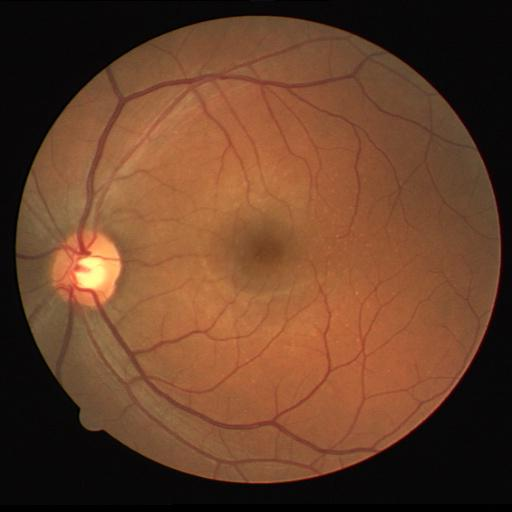

In [76]:
npz_path = '../../data/2dsegmentation/train_npz/103.npz'
npz = np.load(npz_path)
Image.fromarray(npz['image'])

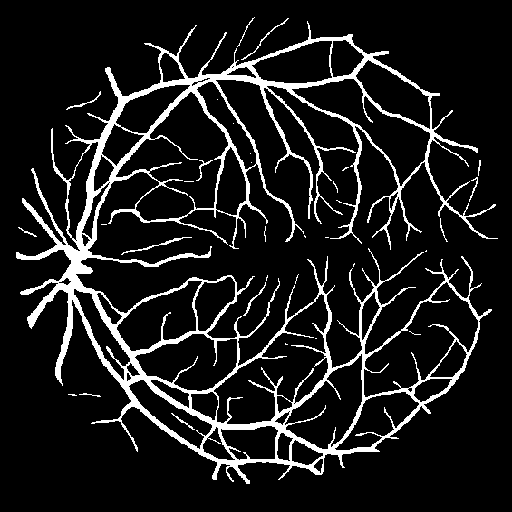

In [77]:
Image.fromarray(npz['label']*255).convert('1')

In [17]:
np.set_printoptions(threshold=300000)
a['image'].shape, a['label'].shape

((512, 512), (512, 512))

In [8]:
npz_path = r'..\project_TransUNet\data\Synapse\train_npz\case0005_slice000.npz'
b = np.load(npz_path)
b['label'].shape, b['image'].shape

((512, 512), (512, 512))

In [17]:
a['label'].max()

8.0

In [3]:
with open('../lists/lists_2d/train.txt', 'w') as f:
    for i in range(121):
        f.write(str(i)+'\n')
f.close()